<a href="https://colab.research.google.com/github/cyuancheng/Machine_Learning_Practice/blob/master/ML101_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Data Exploration
The data was from Kaggle black [dataset(https://www.kaggle.com/dalalmanish/black-friday)

In [0]:
# https://www.kaggle.com/dalalmanish/black-friday

data = pd.read_csv('https://raw.githubusercontent.com/princetonschoolofai/ML101Retail/master/train.csv')

data.head()  

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [0]:
# count nan 
[sum(data[x].isna()) for x in data]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 173638, 383247, 0]

In [0]:
print('missing values:\n')
for x in data.columns:
  print(str(x)+':', sum(data[x].isna()))

missing values:

User_ID: 0
Product_ID: 0
Gender: 0
Age: 0
Occupation: 0
City_Category: 0
Stay_In_Current_City_Years: 0
Marital_Status: 0
Product_Category_1: 0
Product_Category_2: 173638
Product_Category_3: 383247
Purchase: 0


In [0]:
print('Number of transactions = {}'.format(len(data)))
print('Number of unique buyers = {}'.format(len(data['User_ID'].unique())))
print('Number of unique products = {}'.format(len(data['Product_ID'].unique())))

Number of transactions = 550068
Number of unique buyers = 5891
Number of unique products = 3631


### Data Visulization and Analysis

In [0]:
# define colors function for for figure
import random
 
def colors(n):
  ret = []
  for i in range(n):
    r = random.random()
    g = random.random()
    b = random.random()
    ret.append((r,g,b)) 
  return ret

#### Distribution of Age

matplotlib


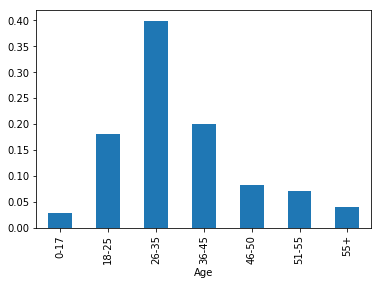

pandas


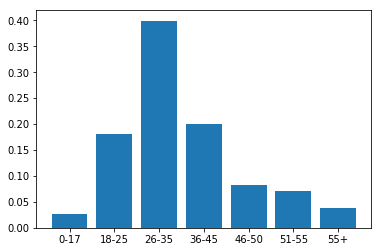

This is incorrect! Need to drop duplicates


In [0]:
# Distribution of Age

prop_age = data.groupby('Age').count()['User_ID']/len(data)

#c = colors(7)
#print(c)
#plt.bar(prop_age.index, prop_age.values, color=c)
#plt.bar(prop_age.index, prop_age.values)
print('matplotlib')
prop_age.plot(kind='bar')
plt.show()
print('pandas')
plt.bar(prop_age.index, prop_age.values)
plt.show()
###
print('This is incorrect! Need to drop duplicates')

#### Distribution of Age (Corrected)

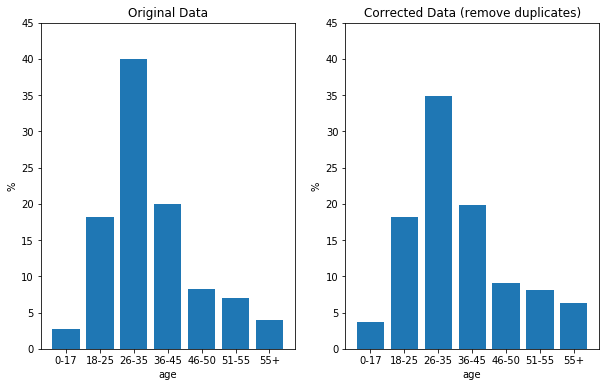

In [0]:
# Correct distribution of Age
unique_users = data[['User_ID','Age', 'Gender', 'City_Category']].drop_duplicates()
prop_age_correct = unique_users.groupby('Age').count()['User_ID']/len(unique_users)

fig= plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.ylim(0, 45)
plt.ylabel('%');plt.xlabel('age')

plt.bar(prop_age.index, prop_age.values*100)
plt.title('Original Data')



plt.subplot(1, 2, 2)
plt.ylim(0, 45)
plt.ylabel('%');plt.xlabel('age')
plt.bar(prop_age_correct.index, prop_age_correct.values*100)
plt.title('Corrected Data (remove duplicates)')


plt.show()




#### Average number vs value of purchases by age 

Age
0-17      69.275229
18-25     93.227315
26-35    106.959084
36-45     94.269923
46-50     86.065913
51-55     80.043659
55+       57.806452
Name: User_ID, dtype: float64
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
dtype: float64


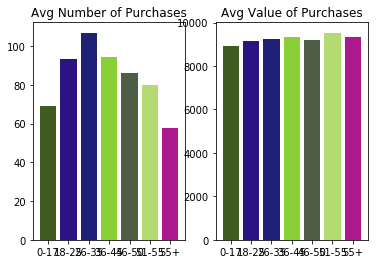

In [0]:
# Average number of purchases by age group and average value per age group
num_purch_age = data.groupby('Age').count()['User_ID']
num_people_age = unique_users.groupby('Age').count()['User_ID']

avg_purch_age = num_purch_age/num_people_age
print('average number of purchases by age/n')
print(avg_purch_age)


val_purch_age = data.groupby('Age').sum()['Purchase']
num_people_age = unique_users.groupby('Age').count()['User_ID']

val_purch_age = val_purch_age/num_purch_age
print('average value of purchases by age/n')
print(val_purch_age)





plt.subplot(1, 2, 1)

plt.bar(avg_purch_age.index, avg_purch_age.values, color=c)
plt.title('Avg Number of Purchases')

plt.subplot(1, 2, 2)

plt.bar(val_purch_age.index, val_purch_age.values, color=c)
plt.title('Avg Value of Purchases')


plt.show()

#########################
# Average number of purchases by age group and average value per age group
num_purch_age = data.groupby('Age').count()['User_ID']
num_people_age = unique_users_age.groupby('Age').count()['User_ID']

avg_purch_age = num_purch_age/num_people_age
print(avg_purch_age)


val_purch_age = data.groupby('Age').sum()['Purchase']
num_people_age = unique_users_age.groupby('Age').count()['User_ID']

val_purch_age = val_purch_age/num_purch_age

print(val_purch_age)





plt.subplot(1, 2, 1)

plt.bar(avg_purch_age.index, avg_purch_age.values, color=c)
plt.title('Avg Number of Purchases')

plt.subplot(1, 2, 2)

plt.bar(val_purch_age.index, val_purch_age.values, color=c)
plt.title('Avg Value of Purchases')


plt.show()

In [0]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


Gender
F    81.518007
M    98.049467
Name: User_ID, dtype: float64


Text(0.5, 1.0, 'Avg Number of Gender')

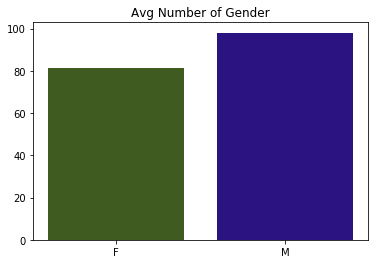

In [0]:
# Do the same analysis for Gender and City Category
# Gender

num_purch_gender = data.groupby('Age','Gender').count()['User_ID']
num_people_gender = unique_users_age.groupby('Age','Gender').count()['User_ID']

avg_purch_gender = num_purch_gender/num_people_gender
print(avg_purch_gender)


plt.bar(avg_purch_gender.index, avg_purch_gender.values, color=c)
plt.title('Avg Number of Gender')


City_Category
A    141.358852
B    135.426479
C     54.531698
Name: User_ID, dtype: float64


Text(0.5, 1.0, 'Avg Number of city')

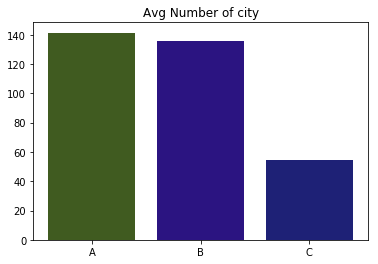

In [0]:
# Do the same analysis for Gender and City Category
# Gender

num_purch_city = data.groupby('City_Category').count()['User_ID']
num_people_city = unique_users_age.groupby('City_Category').count()['User_ID']

avg_purch_city = num_purch_city/num_people_city
print(avg_purch_city)


plt.bar(avg_purch_city.index, avg_purch_city.values, color=c)
plt.title('Avg Number of city')

Age    City_Category
0-17   A                101.760000
       B                108.700000
       C                 49.811189
18-25  A                128.668224
       B                130.655589
       C                 55.110687
26-35  A                159.967462
       B                140.466258
       C                 57.721277
36-45  A                151.232955
       B                142.083582
       C                 54.570122
46-50  A                143.528302
       B                139.767123
       C                 53.277108
51-55  A                 91.029851
       B                131.414815
       C                 52.548387
55+    A                 72.918367
       B                 89.000000
       C                 48.184906
Name: User_ID, dtype: float64
Age    City_Category
0-17   A                8615.110456
       B                8917.295308
       C                9059.503299
18-25  A                8833.734084
       B                9031.706985
       C     

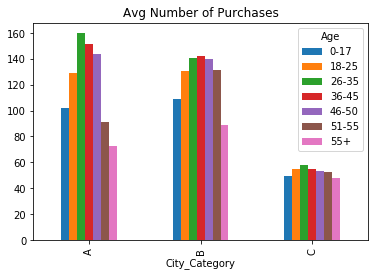

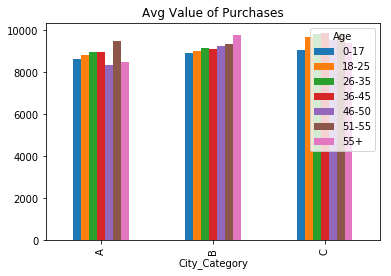

In [0]:
# Correct distribution of City Category

# Average number of purchases by age group and average value per age group
num_purch_age = data.groupby(['Age','City_Category']).count()['User_ID']
num_people_age = unique_users_age.groupby(['Age','City_Category']).count()['User_ID']

avg_purch_age = num_purch_age/num_people_age
print(avg_purch_age)


val_purch_age = data.groupby(['Age','City_Category']).sum()['Purchase']
num_people_age = unique_users_age.groupby(['Age','City_Category']).count()['User_ID']

val_purch_age = val_purch_age/num_purch_age

print(val_purch_age)



avg_purch_age.unstack(level=0).plot(kind='bar')
plt.title('Avg Number of Purchases')



val_purch_age.unstack(level=0).plot(kind='bar')
plt.title('Avg Value of Purchases')


plt.show()

In [0]:
# crisp pm

In [0]:
# Average number of purchases by gender and average value per purchase, per city category

In [0]:
# Correct distribution of Gender

In [0]:
# Average number of purchases by gender and average value per purchase, per gender

Age    Gender
0-17   F          65.166667
       M          71.564286
18-25  F          85.811847
       M          95.948849
26-35  F          93.122936
       M         111.959549
36-45  F          81.591592
       M          99.332134
46-50  F          72.521978
       M          93.128940
51-55  F          69.676056
       M          84.386431
55+    F          51.343434
       M          60.150183
Name: User_ID, dtype: float64
Age    Gender
0-17   F         8338.771985
       M         9235.173670
18-25  F         8343.180201
       M         9440.942971
26-35  F         8728.251754
       M         9410.337578
36-45  F         8959.844056
       M         9453.193643
46-50  F         8842.098947
       M         9357.471509
51-55  F         9042.449666
       M         9705.094802
55+    F         9007.036199
       M         9438.195603
dtype: float64


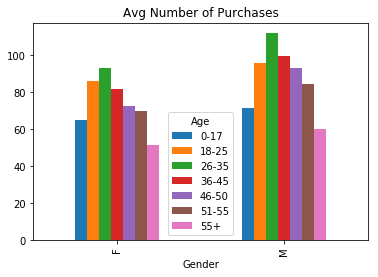

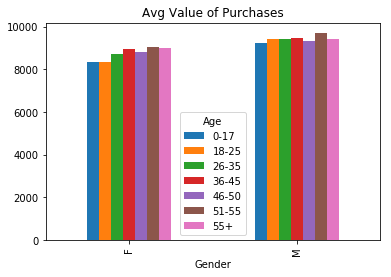

In [0]:
#Analysis by Age and Gender


# Average number of purchases by age group and average value per age group
num_purch_age = data.groupby(['Age','Gender']).count()['User_ID']
num_people_age = unique_users_age.groupby(['Age','Gender']).count()['User_ID']

avg_purch_age = num_purch_age/num_people_age
print(avg_purch_age)


val_purch_age = data.groupby(['Age','Gender']).sum()['Purchase']
num_people_age = unique_users_age.groupby(['Age','Gender']).count()['User_ID']

val_purch_age = val_purch_age/num_purch_age

print(val_purch_age)



avg_purch_age.unstack(level=0).plot(kind='bar')
plt.title('Avg Number of Purchases')



val_purch_age.unstack(level=0).plot(kind='bar')
plt.title('Avg Value of Purchases')


plt.show()

In [0]:
# Do the Same for City and Gender

In [0]:
# So far we have been looking into averages. Now let's check the dispersion. Here is were the actual value is

# Dispersion of the total value purchased by Id and Age

age_groups = data['Age'].unique()

for item in age_groups:
  temp = data[data['Age'] == item]
  average = np.mean(temp['Purchase'])
  stdev = np.std(temp['Purchase'])
  
  print(item,average,stdev)
  
  

0-17 8933.464640444974 5110.944823427657
55+ 9336.280459449405 5011.377469555721
26-35 9252.690632869888 5010.515894010119
46-50 9208.625697468327 4967.162022122683
51-55 9534.808030960236 5087.3020111738415
36-45 9331.350694917874 5022.901050378541
18-25 9169.663606261289 5034.296739627781


(array([255., 271., 676., 435., 341., 148., 239.,  39., 121.,  19.]),
 array([1.40000e+01, 2.39730e+03, 4.78060e+03, 7.16390e+03, 9.54720e+03,
        1.19305e+04, 1.43138e+04, 1.66971e+04, 1.90804e+04, 2.14637e+04,
        2.38470e+04]),
 <a list of 10 Patch objects>)

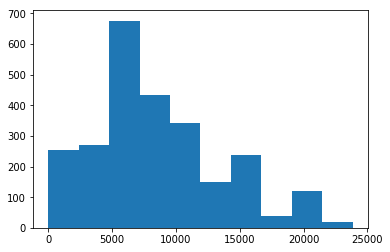

In [0]:
plt.hist(data[(data['Age']=='0-17') & (data['City_Category'] == 'A')]['Purchase'])

In [0]:
# Play around and find some information

In [0]:
# find the three most probable categories by Age


In [0]:
# homework

# for each age, three product catagories that are most probable has hignest probability.

In [0]:
data['Product_Category_1'].unique()


array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [0]:
data['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [0]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])